[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Sentiment (TextBlob): Sentiment(polarity=0.8, subjectivity=1.0)
Sentiment (VADER): {'neg': 0.0, 'neu': 0.469, 'pos': 0.531, 'compound': 0.7777}

TextBlob Sentiments:
TextBlob Sentiment of 'The new restaurant in town is fantastic!': Sentiment(polarity=0.3181818181818182, subjectivity=0.6772727272727272)
TextBlob Sentiment of 'I am extremely disappointed with the customer service.': Sentiment(polarity=-0.75, subjectivity=0.75)
TextBlob Sentiment of 'It's an average day, nothing special.': Sentiment(polarity=0.10357142857142858, subjectivity=0.48571428571428565)
TextBlob Sentiment of 'The trip was wonderful and full of surprises.': Sentiment(polarity=0.675, subjectivity=0.775)
TextBlob Sentiment of 'I hated the way they treated us, very unprofessional.': Sentiment(polarity=-0.35, subjectivity=0.5)

VADER Sentiments:
VADER Sentiment of 'The new restaurant in town is fantastic!': {'neg': 0.0, 'neu': 0.607, 'pos': 0.393, 'compound': 0.5983}
VADER Sentiment of 'I am extremely disappointed wit

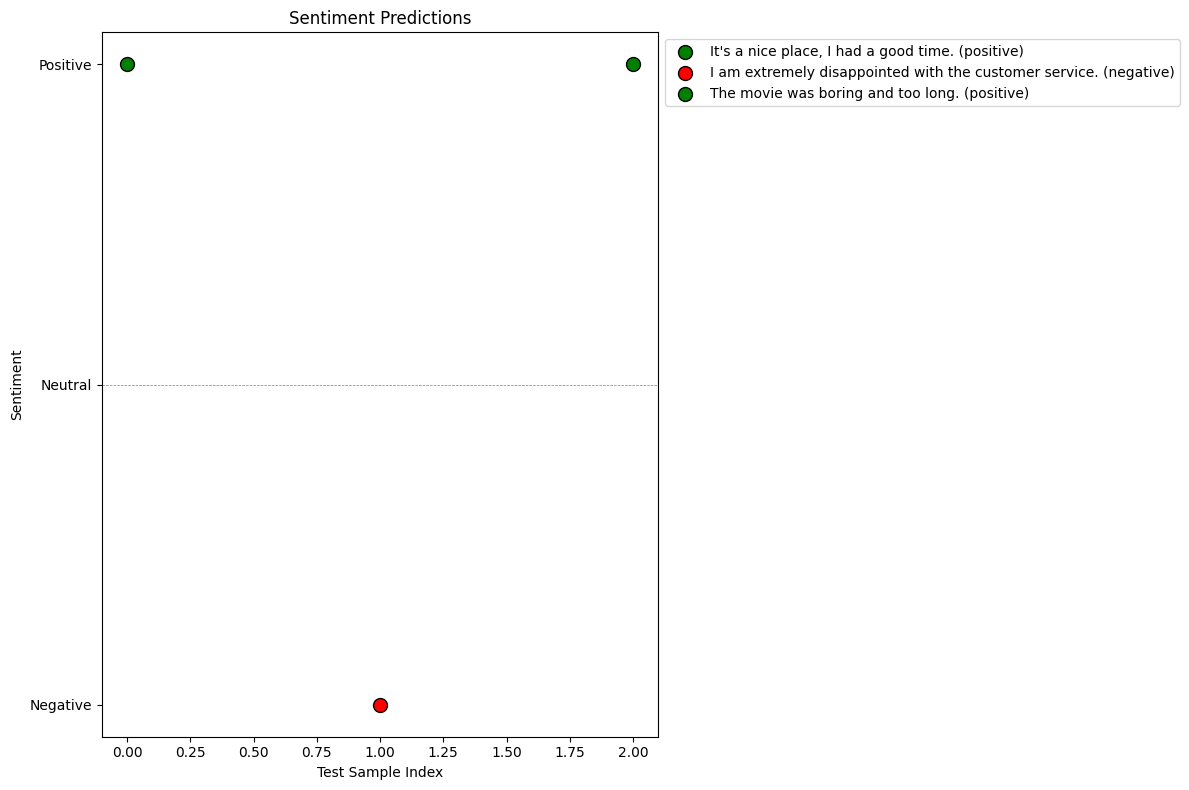

In [ ]:
import nltk
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Download necessary NLTK data (only the first time)
nltk.download('punkt')

# Example text
sample_text = "The weather is nice today, I feel happy!"

# Create a TextBlob object
text_blob = TextBlob(sample_text)

# Get the sentiment
print("Sentiment (TextBlob):", text_blob.sentiment)

# Initialize VADER sentiment analyzer
vader_analyzer = SentimentIntensityAnalyzer()

# Get the sentiment scores
vader_scores = vader_analyzer.polarity_scores(sample_text)
print("Sentiment (VADER):", vader_scores)

# List of texts for sentiment analysis
sample_texts = [
    "The new restaurant in town is fantastic!",
    "I am extremely disappointed with the customer service.",
    "It's an average day, nothing special.",
    "The trip was wonderful and full of surprises.",
    "I hated the way they treated us, very unprofessional."
]

# Analyze sentiment using TextBlob
print("\nTextBlob Sentiments:")
for text in sample_texts:
    blob = TextBlob(text)
    print(f"TextBlob Sentiment of '{text}': {blob.sentiment}")

# Analyze sentiment using VADER
print("\nVADER Sentiments:")
for text in sample_texts:
    vs = vader_analyzer.polarity_scores(text)
    print(f"VADER Sentiment of '{text}': {vs}")

# Sample data with corresponding labels
texts = [
    "The new restaurant in town is fantastic!",
    "I am extremely disappointed with the customer service.",
    "It's an average day, nothing special.",
    "The trip was wonderful and full of surprises.",
    "I hated the way they treated us, very unprofessional.",
    "The movie was boring and too long.",
    "I loved the concert, it was amazing!",
    "The product broke after one use, very disappointed.",
    "It's a nice place, I had a good time.",
    "The food was terrible, will not visit again."
]
labels = ['positive', 'negative', 'neutral', 'positive', 'negative', 'negative', 'positive', 'negative', 'positive', 'negative']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.3, random_state=42)

# Create a pipeline with a vectorizer and classifier
model_pipeline = make_pipeline(CountVectorizer(), MultinomialNB())

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict sentiments
predicted_labels = model_pipeline.predict(X_test)
print("\nPredicted labels:", predicted_labels)

# Evaluate the model
accuracy = model_pipeline.score(X_test, y_test)
print("Model accuracy:", accuracy)

# Visualization of the predicted labels
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
colors = ['green' if sentiment == 'positive' else 'red' if sentiment == 'negative' else 'blue' for sentiment in predicted_labels]

plt.figure(figsize=(12, 8))
for i, (text, label) in enumerate(zip(X_test, predicted_labels)):
    plt.scatter(i, sentiment_map[label], color=colors[i], label=f'{text} ({label})', edgecolor='k', s=100)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.yticks([-1, 0, 1], ['Negative', 'Neutral', 'Positive'])
plt.xlabel('Test Sample Index')
plt.ylabel('Sentiment')
plt.title('Sentiment Predictions')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
plt.tight_layout()
plt.show()
